# Model Distribution Analysis

In [1]:
import random
import pickle
from collections import defaultdict

import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.iolib.summary2 import summary_col

from small_crisis import CrisisModel, CrisisAgent, CrisisWorld

from consul.agent_types.rl_agent import RLAgent
from consul.agent_types.cbr_agent import CaseBased_RLAgent

# Experiments 2.1, 2.2

In [2]:
with open("data_out/ex_2.1.pickle", "rb") as f:
    rl_table, cb_table = pickle.load(f)

In [3]:
def get_mean(group):
    return len(group[(group.Step>50) & (group.quality==1)])/len(group[group.Step>50])

(0, 1)

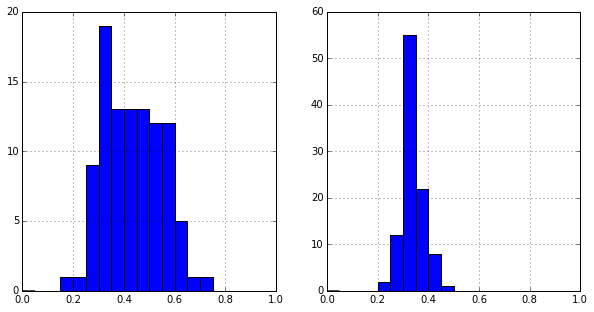

In [4]:
rl_means = rl_table.groupby("Seed").aggregate(get_mean)["quality"]
cb_means = cb_table.groupby("Seed").aggregate(get_mean)["quality"]

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

rl_means.hist(ax=ax1, bins=np.linspace(0, 1, 21))
cb_means.hist(ax=ax2, bins=np.linspace(0, 1, 21))

ax1.set_xlim(0, 1)
ax2.set_xlim(0, 1)

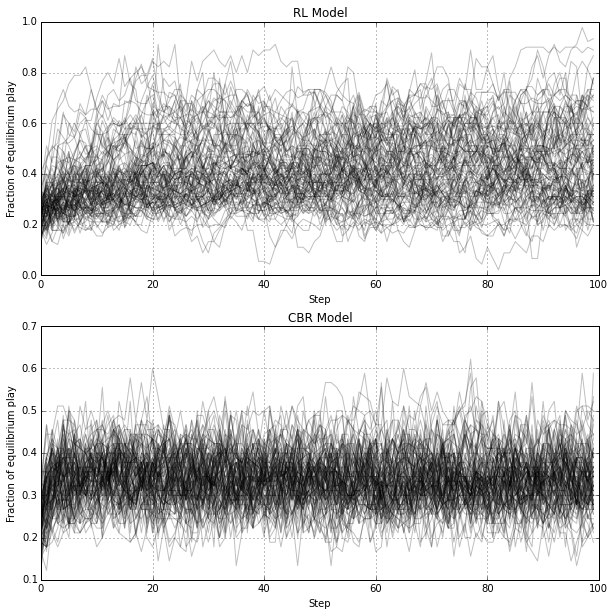

In [5]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.set_title("RL Model")
for seed, group in rl_table.groupby("Seed"):
    s = group.groupby("Step").aggregate(lambda x: len(x[x.quality==1])/len(x))["quality"]
    ax1.plot(s, c='k', alpha=0.25)
    ax1.grid(True)
    ax1.set_xlabel("Step")
    ax1.set_ylabel("Fraction of equilibrium play")

ax2.set_title("CBR Model")
for seed, group in cb_table.groupby("Seed"):
    s = group.groupby("Step").aggregate(lambda x: len(x[x.quality==1])/len(x))["quality"]
    ax2.plot(s, c='k', alpha=0.25)
    ax2.grid(True)
    ax2.set_xlabel("Step")
    ax2.set_ylabel("Fraction of equilibrium play")


In [ ]:
with open("data_out/ex_2.2.pickle", "rb") as f:
    rl_table2, cb_table2 = pickle.load(f)

rl_means = rl_table2.groupby("Seed").aggregate(get_mean)["quality"]
cb_means = cb_table2.groupby("Seed").aggregate(get_mean)["quality"]

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

rl_means.hist(ax=ax1, bins=np.linspace(0, 1, 21))
cb_means.hist(ax=ax2, bins=np.linspace(0, 1, 21))

ax1.set_xlim(0, 1)
ax2.set_xlim(0, 1)

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.set_title("RL Model")
for seed, group in rl_table2.groupby("Seed"):
    s = group.groupby("Step").aggregate(lambda x: len(x[x.quality==1])/len(x))["quality"]
    ax1.plot(s, c='k', alpha=0.25)
    ax1.grid(True)
    ax1.set_xlabel("Step")
    ax1.set_ylabel("Fraction of equilibrium play")

ax2.set_title("CBR Model")
for seed, group in cb_table2.groupby("Seed"):
    s = group.groupby("Step").aggregate(lambda x: len(x[x.quality==1])/len(x))["quality"]
    ax2.plot(s, c='k', alpha=0.25)
    ax2.grid(True)
    ax2.set_xlabel("Step")
    ax2.set_ylabel("Fraction of equilibrium play")


# Experiment 2.3

In [6]:
with open("data_out/ex_2.3.pickle", "rb") as f:
    rl_table, cb_table, seed_table = pickle.load(f)

(0, 1)

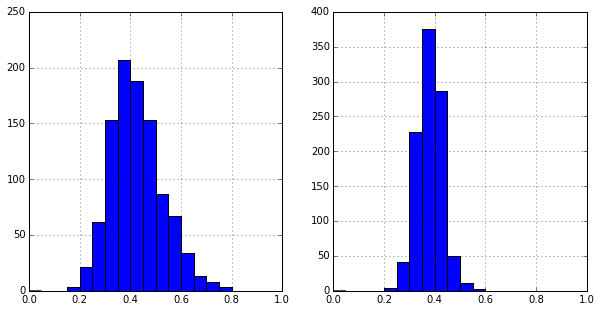

In [7]:
rl_means = rl_table.groupby("Seed").aggregate(get_mean)["quality"]
cb_means = cb_table.groupby("Seed").aggregate(get_mean)["quality"]

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

rl_means.hist(ax=ax1, bins=np.linspace(0, 1, 21))
cb_means.hist(ax=ax2, bins=np.linspace(0, 1, 21))

ax1.set_xlim(0, 1)
ax2.set_xlim(0, 1)

In [8]:
both_means = pd.DataFrame({"RL": rl_means, "CB": cb_means})
both_means["Delta"] = both_means.CB - both_means.RL

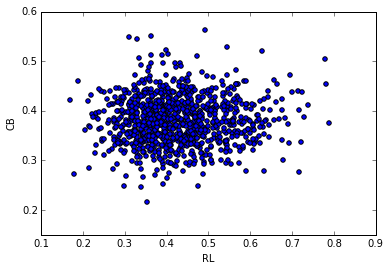

In [9]:
both_means.plot(kind='scatter', x="RL", y="CB")

-0.0446070787341


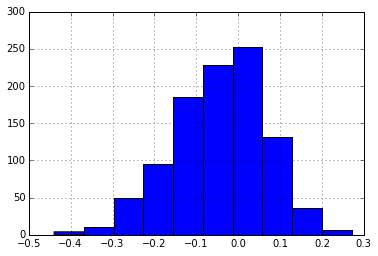

In [10]:
both_means.Delta.hist()
print(both_means.Delta.mean())

In [11]:
scipy.stats.ttest_1samp(both_means.Delta, 0)

(-12.707563740156745, 2.1186419045926445e-34)

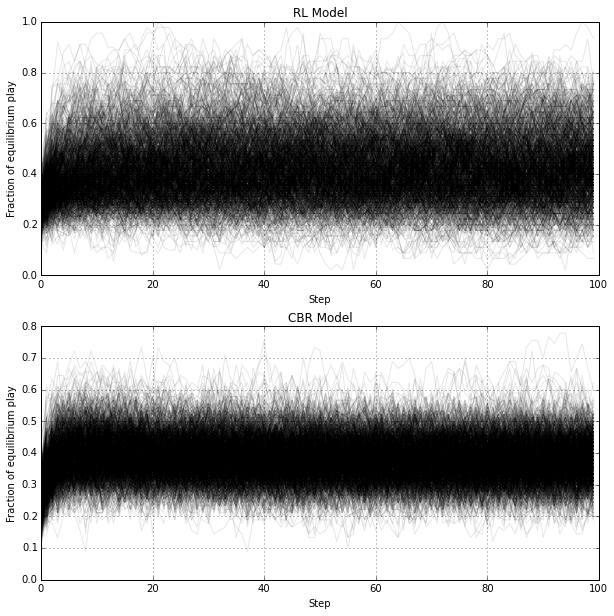

In [12]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.set_title("RL Model")
for seed, group in rl_table.groupby("Seed"):
    s = group.groupby("Step").aggregate(lambda x: len(x[x.quality==1])/len(x))["quality"]
    ax1.plot(s, c='k', alpha=0.1)
    ax1.grid(True)
    ax1.set_xlabel("Step")
    ax1.set_ylabel("Fraction of equilibrium play")

ax2.set_title("CBR Model")
for seed, group in cb_table.groupby("Seed"):
    s = group.groupby("Step").aggregate(lambda x: len(x[x.quality==1])/len(x))["quality"]
    ax2.plot(s, c='k', alpha=0.1)
    ax2.grid(True)
    ax2.set_xlabel("Step")
    ax2.set_ylabel("Fraction of equilibrium play")


In [13]:
rl_qualities = rl_table.groupby("Seed").aggregate(get_mean)["quality"].reset_index().\
    merge(seed_table, on="Seed")
    
cb_qualities = cb_table.groupby("Seed").aggregate(get_mean)["quality"].reset_index().\
    merge(seed_table, on="Seed")

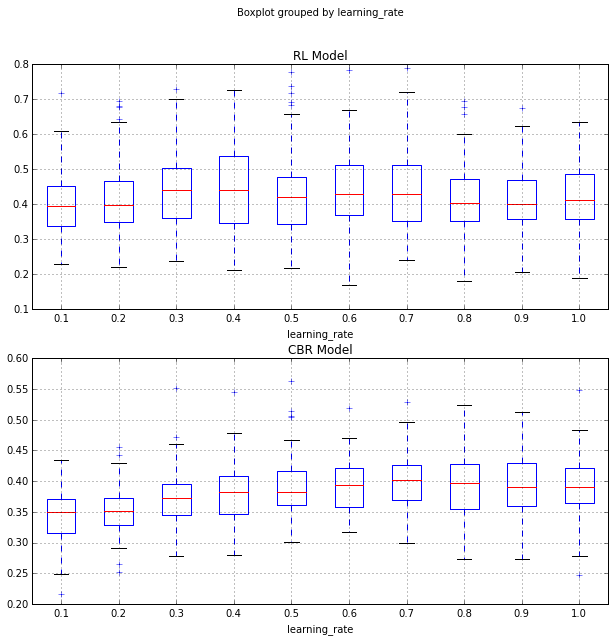

In [14]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

rl_qualities.boxplot(column='quality', by='learning_rate', ax=ax1)
cb_qualities.boxplot(column='quality', by='learning_rate', ax=ax2)

ax1.set_title("RL Model")
ax2.set_title("CBR Model")

In [15]:
rl_qualities["Const."] = 1
cb_qualities["Const."] = 1

In [16]:
rl_lm = sm.OLS(rl_qualities.quality, rl_qualities[["Const.", "learning_rate"]]).fit()
print(rl_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.003705
Date:                Thu, 14 Jan 2016   Prob (F-statistic):              0.951
Time:                        20:33:03   Log-Likelihood:                 868.46
No. Observations:                1000   AIC:                            -1733.
Df Residuals:                     998   BIC:                            -1723.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Const.            0.4249      0.007     61.201

In [17]:
rl_lm = ols("quality ~ C(learning_rate)", data=rl_qualities).fit()
anova_lm(rl_lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(learning_rate),9,0.152730,0.016970,1.654281,0.095718
Residual,990,10.155648,0.010258,NaN,NaN


In [18]:
cb_lm = sm.OLS(cb_qualities.quality, cb_qualities[["Const.", "learning_rate"]]).fit()
print(cb_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     124.7
Date:                Thu, 14 Jan 2016   Prob (F-statistic):           2.25e-27
Time:                        20:33:04   Log-Likelihood:                 1677.0
No. Observations:                1000   AIC:                            -3350.
Df Residuals:                     998   BIC:                            -3340.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Const.            0.3500      0.003    113.168

In [19]:
cb_lm = ols("quality ~ C(learning_rate)", data=cb_qualities).fit()
anova_lm(cb_lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(learning_rate),9,0.347652,0.038628,19.569684,2.073538e-30
Residual,990,1.954131,0.001974,NaN,NaN


## Logit regression(s)

In [ ]:
rl_table_full = rl_table.copy()
# NOTE!:
# Comment the following line out to run the logit on the entire table:
rl_table = rl_table[rl_table.Step>=50]

In [ ]:
rl_outcomes = pd.get_dummies(rl_table.Outcome)

rl_predictors = pd.get_dummies(rl_table.SPE)
rl_predictors["Const."] = 1

regressors = [col for col in rl_predictors.columns if col != "StatusQuo"]

In [ ]:
logits = {}
for col in rl_outcomes.columns:
    logits[col] = sm.Logit(rl_outcomes[col], rl_predictors[regressors]).fit()

In [ ]:
results = summary_col(list(logits.values()), float_format="%0.2f", stars=True)
print(results)

In [ ]:
cb_table_full = cb_table.copy()
# NOTE!:
# Comment the following line out to run the logit on the entire table:
cb_table = cb_table[cb_table.Step>=50]

cb_outcomes = pd.get_dummies(cb_table.Outcome)

cb_predictors = pd.get_dummies(cb_table.SPE)
cb_predictors["Const."] = 1

regressors = [col for col in cb_predictors.columns if col != "StatusQuo"]

logits = {}
for col in cb_outcomes.columns:
    logits[col] = sm.Logit(cb_outcomes[col], cb_predictors[regressors]).fit()

results = summary_col(list(logits.values()), float_format="%0.2f", stars=True)
print(results)

### Testing: One logit per run

In [ ]:
[col for col in rl_predictors.columns if col != "StatusQuo"]

In [ ]:
coeffs = defaultdict(list)
missing = 0
not_converged = 0
errors = 0

for seed, group in rl_table.groupby("Seed"):
    #group = group[group.Step>=50]
    outcomes = pd.get_dummies(group.Outcome)
    predictors = pd.get_dummies(group.SPE)
    predictors["Const."] = 1
    if "War2" not in outcomes.columns:
        missing += 1
        outcomes["War2"] = 0
    #regressors = [col for col in predictors.columns if col != "StatusQuo"]
    regressors = ['Capitulate1', 'Capitulate2', 'War1', 'War2', 'Const.']
    for col in regressors:
        if col not in predictors.columns:
            predictors[col] = 0
    try:
        fit = sm.Logit(outcomes["War2"], predictors[regressors]).fit(disp=False)
    #except Exception as e:
    #    raise e
    except:
        errors += 1
        continue
    if not fit.mle_retvals["converged"]:
        not_converged += 1
        continue
    for coef, val in fit.params.items():
        coeffs[coef].append(val)

In [ ]:
print("Missing: {}".format(missing))
print("Didn't Converge: {}".format(not_converged))
print("Errors: {}".format(errors))

In [ ]:
fig = plt.figure(figsize=(12, 6))
i = 1
for coeff, vals in coeffs.items():
    ax = fig.add_subplot(2, 3, i)
    ax.hist(vals, bins=20)
    ax.set_title(coeff)
    i += 1
    print("{}: {}".format(coeff, len(vals)))

In [ ]:
fig = plt.figure(figsize=(12, 6))
i = 1
for coeff, vals in coeffs.items():
    ax = fig.add_subplot(2, 3, i)
    if coeff != "Const.":
        ax.hist(vals, bins=np.linspace(-2, 2, 21))
    else:
        ax.hist(vals)
    ax.set_title(coeff)
    i += 1
    print("{}: {}".format(coeff, np.mean(vals)))

# Experiment 2.4

This is the one with relative coordinates

In [ ]:
with open("data_out/ex_2.4.pickle", "rb") as f:
    rl_table, cb_table = pickle.load(f)

In [ ]:
rl_means = rl_table.groupby("Seed").aggregate(get_mean)["quality"]
cb_means = cb_table.groupby("Seed").aggregate(get_mean)["quality"]

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

rl_means.hist(ax=ax1, bins=np.linspace(0, 1, 21))
cb_means.hist(ax=ax2, bins=np.linspace(0, 1, 21))

ax1.set_xlim(0, 1)
ax2.set_xlim(0, 1)

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.set_title("RL Model")
for seed, group in rl_table.groupby("Seed"):
    s = group.groupby("Step").aggregate(lambda x: len(x[x.quality==1])/len(x))["quality"]
    ax1.plot(s, c='k', alpha=0.25)
    ax1.grid(True)
    ax1.set_xlabel("Step")
    ax1.set_ylabel("Fraction of equilibrium play")

ax2.set_title("CBR Model")
for seed, group in cb_table.groupby("Seed"):
    s = group.groupby("Step").aggregate(lambda x: len(x[x.quality==1])/len(x))["quality"]
    ax2.plot(s, c='k', alpha=0.25)
    ax2.grid(True)
    ax2.set_xlabel("Step")
    ax2.set_ylabel("Fraction of equilibrium play")


In [ ]:
both_means = pd.DataFrame({"RL": rl_means, "CB": cb_means})
both_means["Delta"] = both_means.CB - both_means.RL
both_means.plot(kind='scatter', x="RL", y="CB")

In [ ]:
both_means.Delta.hist()
print(both_means.Delta.mean())
scipy.stats.ttest_1samp(both_means.Delta, 0)

## Logits

In [ ]:
rl_table_full = rl_table.copy()
# NOTE!:
# Comment the following line out to run the logit on the entire table:
rl_table = rl_table[rl_table.Step>=50]

rl_outcomes = pd.get_dummies(rl_table.Outcome)

rl_predictors = pd.get_dummies(rl_table.SPE)
rl_predictors["Const."] = 1

regressors = [col for col in rl_predictors.columns if col != "StatusQuo"]

logits = {}
for col in rl_outcomes.columns:
    logits[col] = sm.Logit(rl_outcomes[col], rl_predictors[regressors]).fit()

results = summary_col(list(logits.values()), float_format="%0.2f", stars=True)
print(results)

In [ ]:
cb_table_full = cb_table.copy()
# NOTE!:
# Comment the following line out to run the logit on the entire table:
cb_table = cb_table[cb_table.Step>=50]

cb_outcomes = pd.get_dummies(cb_table.Outcome)

cb_predictors = pd.get_dummies(cb_table.SPE)
cb_predictors["Const."] = 1

regressors = [col for col in cb_predictors.columns if col != "StatusQuo"]

logits = {}
for col in cb_outcomes.columns:
    logits[col] = sm.Logit(cb_outcomes[col], cb_predictors[regressors]).fit()

results = summary_col(list(logits.values()), float_format="%0.2f", stars=True)
print(results)

# Experiment 2.5

Delta-coordinates, varying learning rates

In [4]:
def get_mean(group):
    return len(group[(group.Step>50) & (group.quality==1)])/len(group[group.Step>50])

In [5]:
with open("data_out/ex_2.5.pickle", "rb") as f:
    rl_table, cb_table, seed_table = pickle.load(f)

rl_means = rl_table.groupby("Seed").aggregate(get_mean)["quality"]
cb_means = cb_table.groupby("Seed").aggregate(get_mean)["quality"]

(0, 1)

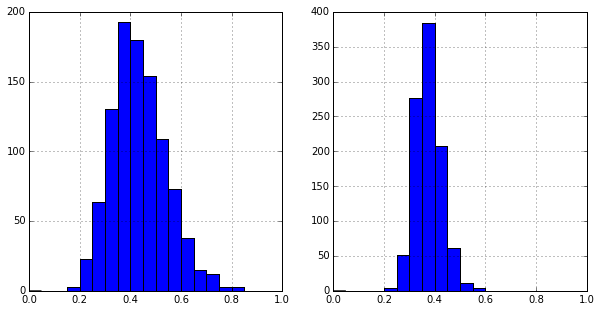

In [6]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

rl_means.hist(ax=ax1, bins=np.linspace(0, 1, 21))
cb_means.hist(ax=ax2, bins=np.linspace(0, 1, 21))

ax1.set_xlim(0, 1)
ax2.set_xlim(0, 1)

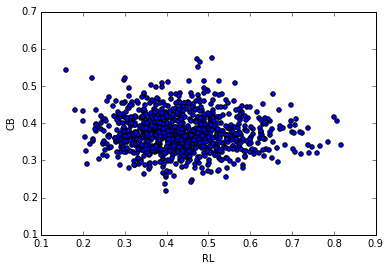

In [7]:
both_means = pd.DataFrame({"RL": rl_means, "CB": cb_means})
both_means["Delta"] = both_means.CB - both_means.RL
both_means.plot(kind='scatter', x="RL", y="CB")

-0.0601120181406


(-15.721106131204461, 6.2610517016726888e-50)

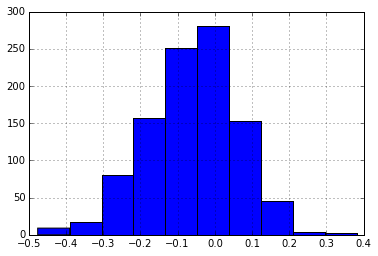

In [8]:
both_means.Delta.hist()
print(both_means.Delta.mean())
scipy.stats.ttest_1samp(both_means.Delta, 0)

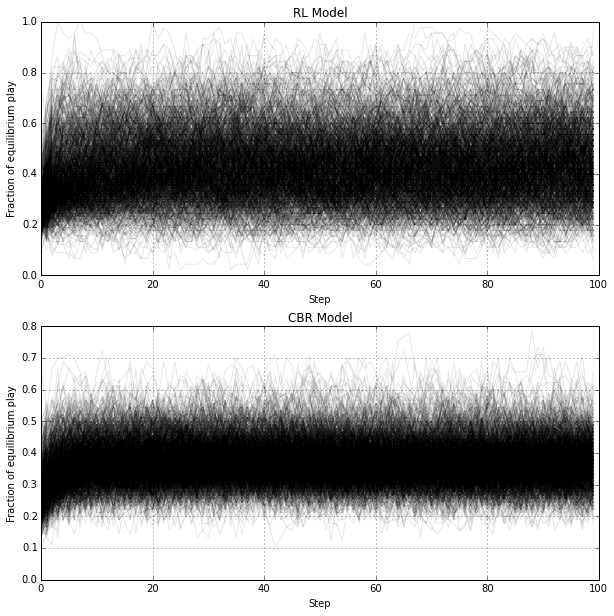

In [9]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.set_title("RL Model")
for seed, group in rl_table.groupby("Seed"):
    s = group.groupby("Step").aggregate(lambda x: len(x[x.quality==1])/len(x))["quality"]
    ax1.plot(s, c='k', alpha=0.1)
    ax1.grid(True)
    ax1.set_xlabel("Step")
    ax1.set_ylabel("Fraction of equilibrium play")

ax2.set_title("CBR Model")
for seed, group in cb_table.groupby("Seed"):
    s = group.groupby("Step").aggregate(lambda x: len(x[x.quality==1])/len(x))["quality"]
    ax2.plot(s, c='k', alpha=0.1)
    ax2.grid(True)
    ax2.set_xlabel("Step")
    ax2.set_ylabel("Fraction of equilibrium play")

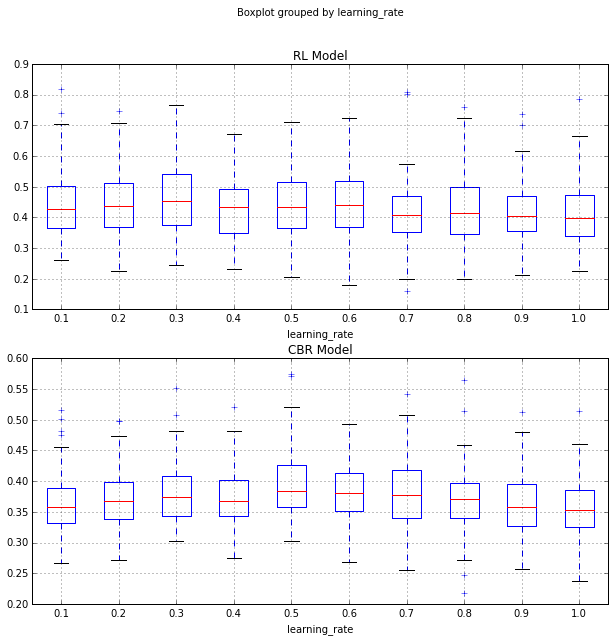

In [10]:
rl_qualities = rl_table.groupby("Seed").aggregate(get_mean)["quality"].reset_index().\
    merge(seed_table, on="Seed")
    
cb_qualities = cb_table.groupby("Seed").aggregate(get_mean)["quality"].reset_index().\
    merge(seed_table, on="Seed")

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

rl_qualities.boxplot(column='quality', by='learning_rate', ax=ax1)
cb_qualities.boxplot(column='quality', by='learning_rate', ax=ax2)

ax1.set_title("RL Model")
ax2.set_title("CBR Model")


In [11]:
rl_lm = ols("quality ~ C(learning_rate)", data=rl_qualities).fit()
anova_lm(rl_lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(learning_rate),9,0.277703,0.030856,2.725837,0.003825
Residual,990,11.206592,0.011320,NaN,NaN


In [12]:
cb_lm = ols("quality ~ C(learning_rate)", data=cb_qualities).fit()
anova_lm(cb_lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(learning_rate),9,0.115442,0.012827,5.209564,6.097571e-07
Residual,990,2.437561,0.002462,NaN,NaN


In [16]:
rl_table_full = rl_table.copy()
# NOTE!:
# Comment the following line out to run the logit on the entire table:
rl_table = rl_table[rl_table.Step>=50]

rl_outcomes = pd.get_dummies(rl_table.Outcome)

rl_predictors = pd.get_dummies(rl_table.SPE)
rl_predictors["Const."] = 1

regressors = [col for col in rl_predictors.columns if col != "StatusQuo"]

logits = {}
for col in rl_outcomes.columns:
    logits[col] = sm.Logit(rl_outcomes[col], rl_predictors[regressors]).fit()

    
logit_order = ["StatusQuo", "Capitulate1", "Capitulate2", "War1", "War2"]
logit_vals = [logits[key] for key in logit_order]
results = summary_col(logit_vals, float_format="%0.2f", stars=True)
print(results)

Optimization terminated successfully.
         Current function value: 0.021777
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.095354
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.282118
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.204943
         Iterations 8
Optimization terminated successfully.

/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind


         Current function value: 0.030345
         Iterations 12

            StatusQuo Capitulate1 Capitulate2   War1     War2  
---------------------------------------------------------------
Capitulate1 -0.13***  2.13***     0.47***     -0.51*** 1.30*** 
            (0.01)    (0.02)      (0.01)      (0.01)   (0.02)  
Capitulate2 -0.58***  1.39***     1.47***     0.02***  -0.35***
            (0.00)    (0.02)      (0.01)      (0.01)   (0.03)  
War1        -0.24***  -2.17***    -0.21***    0.42***  -2.46***
            (0.00)    (0.08)      (0.01)      (0.01)   (0.07)  
War2        0.51***   0.72***     -0.65***    -0.95*** 1.32*** 
            (0.01)    (0.03)      (0.01)      (0.01)   (0.02)  
Const.      2.49***   -6.33***    -4.18***    -2.82*** -5.64***
            (0.00)    (0.02)      (0.01)      (0.00)   (0.01)  
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [17]:
print(results.as_latex())

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lccccc}
\hline
            & StatusQuo & Capitulate1 & Capitulate2 &   War1   &   War2    \\
\hline
\hline
\end{tabular}
\begin{tabular}{llllll}
Capitulate1 & -0.13***  & 2.13***     & 0.47***     & -0.51*** & 1.30***   \\
            & (0.01)    & (0.02)      & (0.01)      & (0.01)   & (0.02)    \\
Capitulate2 & -0.58***  & 1.39***     & 1.47***     & 0.02***  & -0.35***  \\
            & (0.00)    & (0.02)      & (0.01)      & (0.01)   & (0.03)    \\
War1        & -0.24***  & -2.17***    & -0.21***    & 0.42***  & -2.46***  \\
            & (0.00)    & (0.08)      & (0.01)      & (0.01)   & (0.07)    \\
War2        & 0.51***   & 0.72***     & -0.65***    & -0.95*** & 1.32***   \\
            & (0.01)    & (0.03)      & (0.01)      & (0.01)   & (0.02)    \\
Const.      & 2.49***   & -6.33***    & -4.18***    & -2.82*** & -5.64***  \\
            & (0.00)    & (0.02)      & (0.01)      & (0.00)   & (0.01)    \\
\hline
\end{tabular

In [18]:
cb_table_full = cb_table.copy()
# NOTE!:
# Comment the following line out to run the logit on the entire table:
cb_table = cb_table[cb_table.Step>=50]

cb_outcomes = pd.get_dummies(cb_table.Outcome)

cb_predictors = pd.get_dummies(cb_table.SPE)
cb_predictors["Const."] = 1

regressors = [col for col in cb_predictors.columns if col != "StatusQuo"]

logits = {}
for col in cb_outcomes.columns:
    logits[col] = sm.Logit(cb_outcomes[col], cb_predictors[regressors]).fit()

logit_order = ["StatusQuo", "Capitulate1", "Capitulate2", "War1", "War2"]
logit_vals = [logits[key] for key in logit_order]
results = summary_col(logit_vals, float_format="%0.2f", stars=True)
print(results)

Optimization terminated successfully.
         Current function value: 0.184888
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.336184
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.673840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.627655
         Iterations 5
Optimization terminated successfully.

/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
/Users/dmasad/.virtualenvs/consul/lib/python3.4/site-packages/statsmodels/iolib/summary2.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind


         Current function value: 0.207829
         Iterations 8

            StatusQuo Capitulate1 Capitulate2   War1     War2  
---------------------------------------------------------------
Capitulate1 -0.17***  1.26***     -0.57***    -0.29*** 0.87*** 
            (0.00)    (0.01)      (0.01)      (0.00)   (0.01)  
Capitulate2 -0.37***  0.15***     1.22***     -0.33*** -0.17***
            (0.00)    (0.01)      (0.00)      (0.00)   (0.01)  
War1        -0.88***  -1.20***    0.92***     0.62***  -0.69***
            (0.00)    (0.01)      (0.00)      (0.00)   (0.01)  
War2        -0.49***  1.05***     -1.21***    0.17***  1.16*** 
            (0.00)    (0.01)      (0.01)      (0.00)   (0.00)  
Const.      0.05***   -3.28***    -2.32***    -0.77*** -3.09***
            (0.00)    (0.00)      (0.00)      (0.00)   (0.00)  
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [19]:
print(results.as_latex())

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lccccc}
\hline
            & StatusQuo & Capitulate1 & Capitulate2 &   War1   &   War2    \\
\hline
\hline
\end{tabular}
\begin{tabular}{llllll}
Capitulate1 & -0.17***  & 1.26***     & -0.57***    & -0.29*** & 0.87***   \\
            & (0.00)    & (0.01)      & (0.01)      & (0.00)   & (0.01)    \\
Capitulate2 & -0.37***  & 0.15***     & 1.22***     & -0.33*** & -0.17***  \\
            & (0.00)    & (0.01)      & (0.00)      & (0.00)   & (0.01)    \\
War1        & -0.88***  & -1.20***    & 0.92***     & 0.62***  & -0.69***  \\
            & (0.00)    & (0.01)      & (0.00)      & (0.00)   & (0.01)    \\
War2        & -0.49***  & 1.05***     & -1.21***    & 0.17***  & 1.16***   \\
            & (0.00)    & (0.01)      & (0.01)      & (0.00)   & (0.00)    \\
Const.      & 0.05***   & -3.28***    & -2.32***    & -0.77*** & -3.09***  \\
            & (0.00)    & (0.00)      & (0.00)      & (0.00)   & (0.00)    \\
\hline
\end{tabular